## Solution 2: Construct a Hamiltonian matrix $\boldsymbol{\hat{H}}$ for the 1-D Schrödinger equation

In [2]:
# import modules
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

%matplotlib inline

### (1) Construct the Laplace operator  $\boldsymbol{\hat{L}}$ in matrix form.

We want to construct an $n \times n$ matrix $\boldsymbol{\hat{L}}$ (where $n=$ `nmesh`) that does the same thing as the `laplace_numeric` function we had in exercise 1:

$$ \boldsymbol{\hat{L}} \rvert f(x) \rangle = \rvert f''(x) \rangle $$

For example, if we have `nmesh = 5`, then

$$
\frac{1}{\Delta x^2}
\left[ \begin{array}{rrrrr}
    -2 & 1 &   &   & 1 \\
     1 &-2 & 1 &   &   \\
       & 1 &-2 & 1 &   \\
       &   & 1 &-2 & 1 \\
     1 &   &   & 1 &-2 \\
\end{array} 
\right]
\left[ \begin{array}{r}
    f(x_1) \\
    f(x_2) \\
    f(x_3) \\
    f(x_4) \\
    f(x_5) 
\end{array} 
\right]
\approx
\left[ \begin{array}{r}
    f''(x_1) \\
    f''(x_2) \\
    f''(x_3) \\
    f''(x_4) \\
    f''(x_5) 
\end{array} 
\right]
$$

We can construct the above matrix by using the `np.eye(n)` function, which creates an identity matrix with size `n` and the `np.roll` function

In [3]:
nmesh   = 200
xLength = 10.
xvar, dx = np.linspace(0, xLength, nmesh, 
                       endpoint=False, retstep=True)

Imat = np.identity(nmesh)
laplace = (np.roll(Imat, 1, axis=0) - 2*Imat + np.roll(Imat, -1, axis=0))/dx**2
print(laplace*dx**2.)

[[-2.  1.  0. ...,  0.  0.  1.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 1.  0.  0. ...,  0.  1. -2.]]


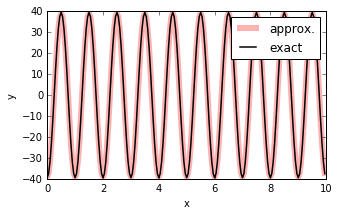

In [4]:
""" Here we test if the matrix laplace does what we want """
# Assume a function
yvar = np.cos(xvar*2*np.pi)

# Calculate exact second derivative
yvar_pp_exact = -((2*np.pi)**2.)*np.cos(xvar*2*np.pi)

# Calculate second de
yvar_pp_approx = np.dot(laplace, yvar)

# Plot results
plt.figure(1, figsize=(5,3))
plt.plot(xvar, yvar_pp_approx, '-r', linewidth=6., alpha=0.3,
        label='approx.')
plt.plot(xvar, yvar_pp_exact, '-k', linewidth=1.5,
        label='exact')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')

### (2) Construct the potential energy operator  $\boldsymbol{\hat{V}}\left(r, r'\right) = V\left(r\right)\delta\left(r, r'\right)$ 

Similar to the Hamiltonian operator, we want to construct a matrix with diagonal elements $V_{ii}=V(x_i)$.

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


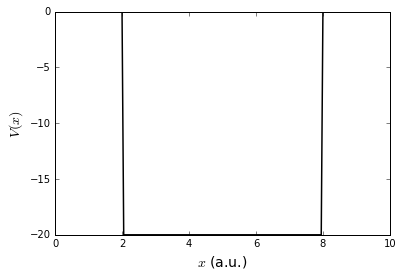

In [42]:
# Here, I choose a sinusoidal function (sine), with an atom at each minimum.  You 
# can make the code more efficient, but I chose to be explicit here.
natoms = 2
Vscale = 20
period = xLength / natoms
# fxn_pot = Vscale * (np.cos(2*np.pi*xvar/period)-1.) / 2.
fxn_pot = np.zeros(nmesh)
fxn_pot[(xvar>2.) & (xvar<8.)] = -Vscale

potential = np.eye(nmesh) * fxn_pot
print(potential)
plt.plot(xvar, fxn_pot, '-k', lw=1.5)
plt.xlabel('$x$ (a.u.)', fontsize=14)
plt.ylabel('$V(x)$', fontsize=14)

### (3) Construct the Hamiltonian matrix $\boldsymbol{\hat{H}} = \frac{1}{2}\boldsymbol{\hat{L} + \boldsymbol{\hat{V}}}$.  Visualize and discuss the Hamiltonian.
*Hint*: You can use `plt.pcolor` to visualize the Hamiltonian matrix:
        
        plt.color(hamiltonian, cmap='viridis')

In [43]:
hamiltonian = -laplace/2. + potential

(0, 50)

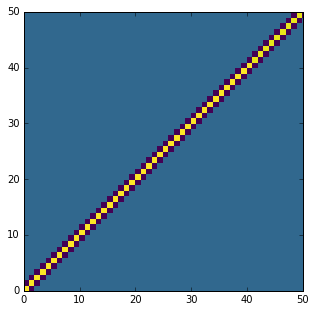

In [44]:
plt.figure(figsize=(5,5))
plt.pcolor(hamiltonian, cmap='viridis')
plt.xlim([0, 50])
plt.ylim([0, 50])

### (4) Solve the eigenvalue problem (diagonalization)
$$ \boldsymbol{\hat{H}} \rvert \psi \rangle = \epsilon \rvert \psi \rangle $$.
### Visualize and discuss the eigenvectors and eigenvalues.

*Hint*: You can use

    eigval, eigvec = lg.eigh(ham)
    eigvec = eigvec.T

In [45]:
eigval, eigvec = lg.eigh(hamiltonian)
eigvec = eigvec.T

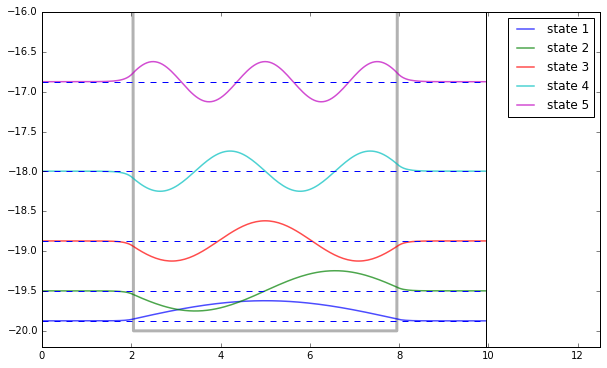

In [54]:
nstates = 5
scale = 2
padding = 2.5

ymin = -Vscale - 0.2
ymax = -16.

plt.figure(figsize=(10, 6))

plt.plot(xvar, fxn_pot, '-k', lw=3, alpha=0.3)
for ii in xrange(nstates):
    plt.plot(xvar, scale*eigvec[ii] + eigval[ii]*np.ones(nmesh),
            lw=1.5, alpha=0.7, label='state '+str(ii+1))
    plt.plot(xvar, eigval[ii]*np.ones(nmesh), '--b', lw=1.)

plt.plot(np.ones(2)*(xLength-dx), [ymin, ymax], 'k')
    
plt.xlim([0, xLength + padding])
plt.ylim([ymin, ymax])
plt.legend(loc=1)

Now we do the same analysis for a sinusoidal potential.

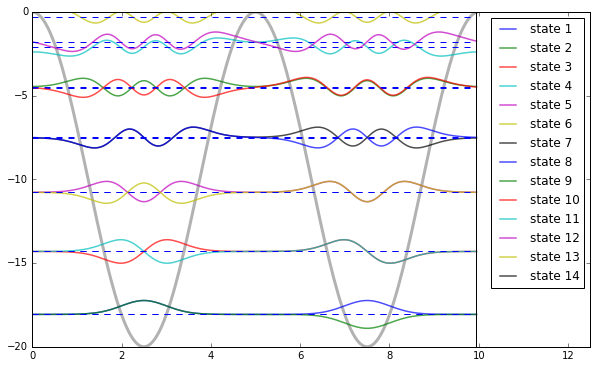

In [87]:
# Define potential
natoms = 2
Vscale = 20
period = xLength / natoms
fxn_pot = Vscale * (np.cos(2*np.pi*xvar/period)-1.) / 2.
potential = np.eye(nmesh) * fxn_pot

# calculate hamiltonian
hamiltonian = -laplace/2. + potential

# calculate eigenvalues and eigenvectors
eigval, eigvec = lg.eigh(hamiltonian)
eigvec = eigvec.T

# plot results
nstates = 7*natoms
scale = 5
padding = 2.5

ymin = min(fxn_pot)
ymax = -0.

plt.figure(figsize=(10, 6))

plt.plot(xvar, fxn_pot, '-k', lw=3, alpha=0.3)
for ii in xrange(nstates):
    plt.plot(xvar, scale*eigvec[ii] + eigval[ii]*np.ones(nmesh),
            lw=1.5, alpha=0.7, label='state '+str(ii+1))
    plt.plot(xvar, eigval[ii]*np.ones(nmesh), '--b', lw=1.)

plt.plot(np.ones(2)*(xLength-dx), [ymin, ymax], 'k')
    
plt.xlim([0, xLength + padding])
plt.ylim([ymin, ymax])
plt.legend(loc=1)

## ADVANCED QUESTIONS/TASKS

### What happens when you have more atoms in your system?

### What happens when you add a defect (vacancy or interstitial)?